# Multilayer Perceptron (MLP)

Author: canan.yildiz@tau.edu.tr

## 1 - Imports

In [ ]:
import numpy as np
import h5py
import scipy
import sklearn.datasets
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from PIL import Image
from scipy import ndimage
from scipy.special import expit     # expit is the sigmoid function

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## 2 - Activation Functions

In [ ]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy 
    Arguments:
      Z -- numpy array of any shape
    Returns:
      A -- output of sigmoid(z), same shape as Z
    """
    A = 1/(1+np.exp(-Z))
    
    return A

def relu(Z):
    """
    Implement the RELU function.
    Arguments:
      Z -- Output of the linear layer, of any shape
    Returns:
      A -- Post-activation parameter, of the same shape as Z
    """
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)

    return A

In [ ]:
# To be used in the backpropagation step

def relu_backward(dA, Z):
    """
    Arguments:
      dA --- gradients for the activations of the current layer l: any shape
      Z --- input of the relu(Z) during the forward propagation step of the current layer l
    Returns:
      dZ --- gradients for Z (Partial derivative of the cost with respect to Z)
    """
    dZ = np.array(dA, copy=True)  # just converting dz to a correct object.
    dZ[Z <= 0] = 0                # When z <= 0, you should set dz to 0. 
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, Z):
    """
    Arguments:
      dA --- gradients for the activations of the current layer l: any shape
      Z --- input of the relu(Z) during the forward propagation step of the current layer l
    Returns:
      dZ -- gradients for Z (Partial derivative of the cost with respect to Z)
    """
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    
    return dZ

    ### Q : How does the notation exactly work: dZ[Z <= 0] = 0  ?

In [ ]:
def plot_costs(costs, learning_rate):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

## 3 - Load and preprocess the data

In [ ]:
# Generate data that is not linearly separable
np.random.seed(7)
X1_raw, Y1_raw = sklearn.datasets.make_moons(n_samples=100, 
                        shuffle=True, noise=0.1, random_state=None)

# Tip: You can also use other datasets, e.g. sklearn.datasets.make_circles
# Note that the "test your implementation" results in this notebook are calculated using the above dataset.

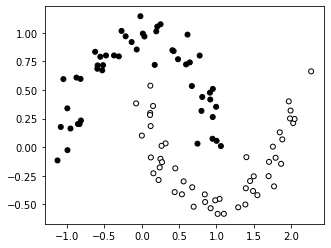

In [ ]:
# Visualize the data:
fig, ax = plt.subplots()
ax.scatter(X1_raw[:, 0], X1_raw[:, 1], marker='o', c=Y1_raw, s=25, edgecolor='k')
plt.show()

In [ ]:
# Check and adjust dimensions if necessary
print(X1_raw.shape)
print(Y1_raw.shape)

# We want to have one datapoint per column in X: (2, 100)
# and one label per column in Y : (1, 100)
X1 = np.transpose(X1_raw)
Y1 = Y1_raw.reshape(1, Y1_raw.shape[0])
print(X1.shape)
print(Y1.shape)

(100, 2)
(100,)
(2, 100)
(1, 100)


## 4 - Initialization of weights and biases

Implement the parameter initialization for one layer of a neural network.

- Use random initialization for the weight matrices. You can use `np.random.randn(shape)*0.01` with the correct shape.
- Use zero initialization for the biases. You can use `np.zeros(shape)`.


In [ ]:
def init_params(n_prev, n_curr):
    """
    Arguments:
    n_prev --- size of the previous layer (size of the input of the current layer)
    n_curr --- size of the current layer
    
    Returns:
    parameters --- (W, b): weight matrix W of shape (n_curr, n_prev), bias vector b of shape (n_curr, 1)
    """

    W = None
    b = None
    
    return (W, b)   

### Q : How to initialize random parameters? Why multiply with 0.01?
### Q : Why is it not a good idea to use zero initialization for the weight matrices? (Hint: symmetry braking) 

### Test your implementation

In [ ]:
np.random.seed(42)
(W,b) = init_params(3,1)
print("W = " + str(W))
print("b = " + str(b))

Run the following code. The expected output is:
```
W = [[ 0.00496714 -0.00138264  0.00647689]]
b = [[0.]]
```

## 5 - Forward propagation step
Implement the forward propagation step for a given layer $l$ of a neural network. The activation "g" can be sigmoid() or relu(). $A^{[l-1]}$ is the output of the previous layer (note that $A^{[0]}$ is the input X). You may find `np.dot()` useful.

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]} \tag{1}$$

$$A^{[l]} = g(Z^{[l]}) \tag{2}$$

In [ ]:
def forward_step(A_prev, W, b, activation):
    """
    Arguments:
    A_prev --- activations of previous layer: numpy array of shape (size of prev layer, number of examples)
    W --- weight matrix: numpy array of shape (size of current layer, size of previous layer)
    b --- bias vector: numpy array of shape (size of current layer, 1)
    activation --- activation of current layer: "sigmoid" or "relu" (as string)

    Returns:
    (Z,A) --- logits and outputs of current layer: each of shape (size of current layer, number of examples)
    """
    
    # The linear part of a layer's forward propagation.
    Z = None
    assert(Z.shape == (W.shape[0], A_prev.shape[1]))

    # The none-linear part
    if activation == "sigmoid":
        A = None
    
    elif activation == "relu":   
        A = None
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))

    return (Z,A)

### Test your implementation

In [ ]:
np.random.seed(42)
A_prev = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)

(Z_s, A_s) = forward_step(A_prev, W, b, activation = "sigmoid")
(Z_r, A_r) = forward_step(A_prev, W, b, activation = "relu")

print("With sigmoid: A = " + str(A_s))
print("With ReLU: A = " + str(A_r))

With sigmoid: A = [[0.87368765 0.83243148]]
With ReLU: A = [[1.93396509 1.6029586 ]]


Run the following code. The expected output is:
```
With sigmoid: A = [[0.87368765 0.83243148]]  
With ReLU: A = [[1.93396509 1.6029586 ]]
```


## 6 - Cost function

Compute the cross-entropy cost $J$ using the following formula. Here, $y^{(i)}$ is the label of the i-th data point and $\hat{y}^{(i)}$ is the prediction of the neural network for the i-th data point. m is the total number of data points.

 $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(\hat{y}^{(i)}\right) + (1-y^{(i)})\log\left(1- \hat{y}^{(i)}\right)) \tag{3}$$


In [ ]:
def compute_cost(Y_hat, Y):
    """
    Arguments:
    Y_hat --- predictions: vector of shape (1, number of examples)
    Y --- labels: vector of shape (1, number of examples)

    Returns:
    cost --- cross-entropy cost
    """
    
    m = Y.shape[1]  # number of examples

    cost = None
    
    cost = np.squeeze(cost)      # turns [[17]] into 17
    assert(cost.shape == ())
    
    return cost

### Test your implementation

In [ ]:
Y = np.asarray([[1, 1, 1]])
Y_hat = np.array([[.8,.9,0.4]])

print("cost = " + str(compute_cost(Y_hat, Y)))

cost = 0.41493159961539694


The expected output is:
```
0.41493159961539694
```

## 7 - Backward propagation step

Implement the backpropagation step for one layer (forward_step $l$) of the neural network by calculating the following partial derivatives, which are the part of the "chain" belonging to this layer. $g(.)$ is the activation function in the current layer, $g'$ is `sigmoid_backward` or `relu_backward` accordingly: 

$$dZ^{[l]} := \frac{\partial \mathcal{J} }{\partial Z^{[l]}} = dA^{[l]} * g'(Z^{[l]}) \tag{4}$$<br>

$$ dW^{[l]} := \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{5}$$<br>

$$ db^{[l]} := \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{6}$$<br>

$$ dA^{[l-1]} := \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{7}$$<br>

In [ ]:
def backward_step(A_prev, W, b, a, Z, dA):
    """    
    Arguments:
    dA --- gradients for the activations of current layer l 
    cache --- (A_prev, W, b, Z) tuple stored in the forward_step of layer l
    activation --- the activation function used in current layer l: "sigmoid" or "relu"
    
    Returns:
    dA_prev --- Gradient for the activations of the previous layer l-1: same shape as A_prev
    dW --- gradients for the weights W of current layer l: same shape as W
    db --- gradients for the biases b of current layer l: same shape as b
    """
    m = A_prev.shape[1]

    # The non-linear backward part
    if a == "relu":
        dZ = None
        
    elif a == "sigmoid":
        dZ = None
    

    # The linear backward part
    dW = None
    db = None
    dA_prev = None
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return (dA_prev, dW, db)

### Q : Give a short explanation of what relu_backward is doing
### Q : What happens when the "axis" parameter of np.sum is set to 1?

### Test your implementation

In [ ]:
np.random.seed(7)
dAL = np.random.randn(1,2)         # (size of this layer, number of examples)
A_prev = np.random.randn(2,2)     # (size of prev layer, number of examples)
W = np.random.randn(1,2)
b = np.random.randn(1,1)
Z = np.random.randn(1,2)

(dA_prev, dW, db) = backward_step(A_prev, W, b, "sigmoid", Z, dAL)
print ("for sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = backward_step(A_prev, W, b, "relu", Z, dAL)
print ("for relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

The Expected output is:
```
for sigmoid:
dA_prev = [[-3.44320629e-04  9.41999464e-05]
 [-6.78568478e-01  1.85644161e-01]]
dW = [[-0.01521102 -0.15265126]]
db = [[0.14045634]]

for relu:
dA_prev = [[-1.50522018e-03  0.00000000e+00]
 [-2.96640654e+00  0.00000000e+00]]
dW = [[ 0.02774167 -0.66684733]]
db = [[0.84526285]]
```



## 8 - Parameter Updates
Implement the function for the parameter update using the following formulas. $\alpha$ is the learning rate.

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{8}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{9}$$



In [ ]:
def update_parameters(parameters, gradients, learning_rate):
    """    
    Arguments:
    parameters --- (W,b,a): parameters of current layer l
    grads --- (dW, db): gradients for the weights and biases of current layer l
    
    Returns:
    (W_new, b_new) --- updated weights and biases
    """
    (W,b,a) = parameters
    (dW,db) = gradients
    W_new = None
    b_new = None

    return (W_new, b_new, a)

### Test your implementation

In [ ]:
np.random.seed(7)
W = np.random.randn(2,3)
b = np.random.randn(2,1)
a = "relu"
dW = np.random.randn(2,3)
db = np.random.randn(2,1)
(W_new, b_new, a) = update_parameters((W,b,a), (dW,db), 0.1)

print ("W_new = "+ str(W_new))
print ("b_new = "+ str(b_new))

W_new = [[ 1.5887599  -0.52598722  0.09536306]
 [ 0.42467111 -0.83945297  0.02820121]]
b_new = [[ 0.02338452]
 [-1.60940017]]


The expected output is:
```
W_new = [[ 1.5887599  -0.52598722  0.09536306]
 [ 0.42467111 -0.83945297  0.02820121]]
b_new = [[ 0.02338452]
 [-1.60940017]]
```



## 9 - Model Initialization

Implement the initialization of a model with the given layer dimensions.


In [ ]:
def init_model(layer_dims, activations):
    """
    Arguments:
    layer_dims --- array of dimensions, for each layer including input layer (e.g. (2,3,1))
    activations --- array of activation functıons to be used, for each layer except the input layer (e.g. ("relu", "sigmoid"))

    Returns:
    model --- array of (W, b, activation) tuples, one for each layer
    """

    L = len(layer_dims) - 1
    model = [None for i in range (0,L+1,1)]
    model[0]=(None,None,None)    # Interpreting Input layer as layer number 0 (no parameters, no activation)

    for l in range(1,L+1,1):
      (W, b) = None
      model[l] = None
    
    return model


### Test your implementation

In [ ]:
np.random.seed(7)
model = init_model((2,3,1), ("relu","sigmoid"))
for l in range(1,len(model),1):
  (W,b,a) = model[l]
  print("Layer",l,":",W.shape[1],"inputs and", W.shape[0],"outputs ( activation",a,")")
  print("W: \n", W)
  print("b: \n", b)

Layer 1 : 2 inputs and 3 outputs ( activation relu )
W: 
 [[ 1.69052570e-02 -4.65937371e-03]
 [ 3.28201637e-04  4.07516283e-03]
 [-7.88923029e-03  2.06557291e-05]]
b: 
 [[0.]
 [0.]
 [0.]]
Layer 2 : 3 inputs and 1 outputs ( activation sigmoid )
W: 
 [[-8.90385858e-06 -1.75472431e-02  1.01765801e-02]]
b: 
 [[0.]]


Expected output is:
```
Layer 1 : 2 inputs and 3 outputs (activation relu )
W: 
 [[ 1.69052570e-02 -4.65937371e-03]
 [ 3.28201637e-04  4.07516283e-03]
 [-7.88923029e-03  2.06557291e-05]]
b: 
 [[0.]
 [0.]
 [0.]]
Layer 2 : 3 inputs and 1 outputs (activation sigmoid )
W: 
 [[-8.90385858e-06 -1.75472431e-02  1.01765801e-02]]
b: 
 [[0.]]
```



## 10 - Model Trainig

Implement the function for training a given model on a given dataset.

Log the cost regularly to see if your model is learning correctly. The cost should be decreasing. After the training, you will have your neural network model with the learned **parameters**, which corresponds to your hypothesis function $h^{*}(x)$.



In [ ]:
def train_model(model, X, Y, num_iterations = 3000, learning_rate = 0.01, print_cost=False):
    """

    Arguments:
    model --- model to be trained: array of (W, b, activation) tuples, one for each layer
    X --- input data: of shape (n, number of examples)
    Y --- labels for the input data: of shape (1, number of examples)
    num_iterations --- number of iterations of the optimization loop
    learning_rate --- learning rate of the gradient descent update rule
    print_cost --- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    model --- model with trained parameters
    costs --- costs saved every 100th itertion during training
    """

    n = X.shape[0]                        # number of features
    m = X.shape[1]                        # number of examples
    L = len(model) - 1                    # number of layers in model (input layer not included)

    assert (n == model[1][0].shape[1])    # n == (layer 1 -> W -> number of columns) ?
    
    costs = []                                # to keep track of the cost
    grads = [None for i in range(0,L+1,1)]
    grads[0] = (None, None)                   # no gradients for input layer 0
    outputs = [None for i in range(0,L+1,1)]
    outputs[0] = (None,X)                     # "Outputs" of input layer are the datapoints X

    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation
        A_prev = None
        for l in range(1,L+1,1):
          (W,b,a) = None
          (Z,A) = None
          outputs[l] = None
          A_prev = None
        AL = None          # Output of last layer L (i.e. predictions)

        # Compute cost
        cost = None
        
        # Initialize backward propagation by calculating gradients for AL
        dAL = None
        
        # Backward propagation
        dA = dAL
        for l in range(L,0,-1):
          (W,b,a) = None
          (Z_prev,A_prev) = None
          (Z,A) = None
          (dA_prev, dW, db) = None
          grads[l] = None
          dA = None
        
        # Update model parameters
        for l in range(1,L+1,1):
          model[l] = None
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)
    
    
    return model, costs

    ### Q : What does np.divide do exactly?

### Test your implementation

In [ ]:
np.random.seed(7)
model = init_model((2,3,1), ("relu","sigmoid"))
num_iterations = 1000
learning_rate = 0.1
print_cost=False
model, costs = train_model(model, X1, Y1, num_iterations, learning_rate, print_cost)
#plot_costs(costs, learning_rate)
for l in range(1,len(model),1):
  (W,b,a) = model[l]
  print("Layer",l)
  print("W: \n", W)
  print("b: \n", b)

Layer 1
W: 
 [[ 5.79827820e-01 -1.24586352e+00]
 [-1.38621994e-01  1.62132531e+00]
 [-3.92030584e-03 -1.59684129e-03]]
b: 
 [[ 1.27401504]
 [ 0.90924215]
 [-0.00462265]]
Layer 2
W: 
 [[ 1.8734467  -1.86390208  0.00894749]]
b: 
 [[-0.15249612]]


Expected output is:

```
Layer 1
W: 
 [[ 5.79827820e-01 -1.24586352e+00]
 [-1.38621994e-01  1.62132531e+00]
 [-3.92030584e-03 -1.59684129e-03]]
b: 
 [[ 1.27401504]
 [ 0.90924215]
 [-0.00462265]]
Layer 2
W: 
 [[ 1.8734467  -1.86390208  0.00894749]]
b: 
 [[-0.15249612]]
```



## 11 - Making Predictions

Using the learned parameters you can now predict the output for new input values $X$.

Implement a function (`model_forward(X, Y, parameters)`) that takes input values $X$ and computes the corresponding output values (predictions) using the learned parameters.

(to  be continued...)

In [ ]:
def model_forward(model, X):
    """
    Implement forward propagation for the given neural network model
    
    Arguments:
    model --- trained model
    X --- data: numpy array of shape (input size, number of examples)
    
    Returns:
    AL --- putput of last layer (predictions)
    outputs --- list of calculated outputs during forward_step
    """

    L = len(model) - 1                        # number of layers in the neural network (input layer not included)
    outputs = [None for i in range(0,L+1,1)]
    outputs[0] = (None,X)                     # "Outputs" of input layer are the datapoints X

    # Forward propagation
    A_prev = X
    for l in range(1,L+1,1):
      (W,b,a) = None
      (Z,A) = None
      outputs[l] = None
      A_prev = None
    AL = None        # Output of last layer L (i.e. predictions)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, outputs

### Test your implementation

In [ ]:
np.random.seed(7)
model = init_model((2,3,1), ("relu","sigmoid"))
num_iterations = 1000
learning_rate = 0.1
print_cost=False
trained_model, costs = train_model(model, X1, Y1, num_iterations, learning_rate, print_cost)
probabilities, outputs = model_forward(model, X1)
print(probabilities[0,1:10])
print(Y1[0,1:10])

[0.01030258 0.99269639 0.94674441 0.41083869 0.05092415 0.96912069
 0.97984208 0.94746217 0.00974002]
[0 1 1 0 0 1 1 1 0]


Expected output is:

```
[0.01030258 0.99269639 0.94674441 0.41083869 0.05092415 0.96912069
 0.97984208 0.94746217 0.00974002]
[0 1 1 0 0 1 1 1 0]
```



## 12 - Performance Analysis

Implement a function for calculating the accuracy of given probability outputs, given the expetcted labels Y.

In [ ]:
def model_accuracy(AL, Y):
    """    
    Arguments:
    AL --- probability outputs to be assessed
    Y --- ground truth (expected true labels)
    
    Returns:
    p --- predicted classes for the given dataset X
    accuracy --- accuracy of the predictions (correct rate)
    """
    m = Y.shape[1]    # number of data points

    # convert probas to 0/1 predictions
    for i in range(0, AL.shape[1]):
        if AL[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    accuracy = np.sum((p == Y)/m)
        
    return (p, accuracy)

## 13 - Test your implementation

In [ ]:
# Train set accuray of our model_1
np.random.seed(77)
model = init_model((2,5,1), ("relu","sigmoid"))
num_iterations = 2000
learning_rate = 0.1
print_cost=True
traıned_model, costs = train_model(model, X1, Y1, num_iterations, learning_rate, print_cost)

AY, outputs = model_forward(trained_model, X1)

plot_costs(costs, learning_rate)

p, accuracy = model_accuracy(AY, Y1)
print("Train Accuracy: ", accuracy)